<a href="https://colab.research.google.com/github/arminwitte/llsi/blob/notebooks/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install llsi

In [3]:
!wget https://raw.githubusercontent.com/arminwitte/llsi/80150bc50595bbd6ba2e06b351b0c439b023c867/data/heated_wire_data.npy

--2024-09-07 19:22:46--  https://raw.githubusercontent.com/arminwitte/llsi/80150bc50595bbd6ba2e06b351b0c439b023c867/data/heated_wire_data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7152728 (6.8M) [application/octet-stream]
Saving to: ‘heated_wire_data.npy’

heated_wire_data.np 100%[===================>]   6.82M  --.-KB/s    in 0.1s    

2024-09-07 19:22:47 (71.0 MB/s) - ‘heated_wire_data.npy’ saved [7152728/7152728]



In [4]:
import numpy as np

import llsi

d = np.load("heated_wire_data.npy")



In [5]:
t = d[:, 0]
Re = d[:, 1]
Nu = d[:, 2]

In [6]:
data = llsi.SysIdData(t=t, Re=Re, Nu=Nu)
data.equidistant()
data.center()
data.downsample(30)
data, test_set = data.split(0.6)
data.lowpass(1, 10)
data.crop(start=100)
data.center()
test_set.center()

Splitting at 5961


M shape: (15, 1)
M shape: (15, 1)


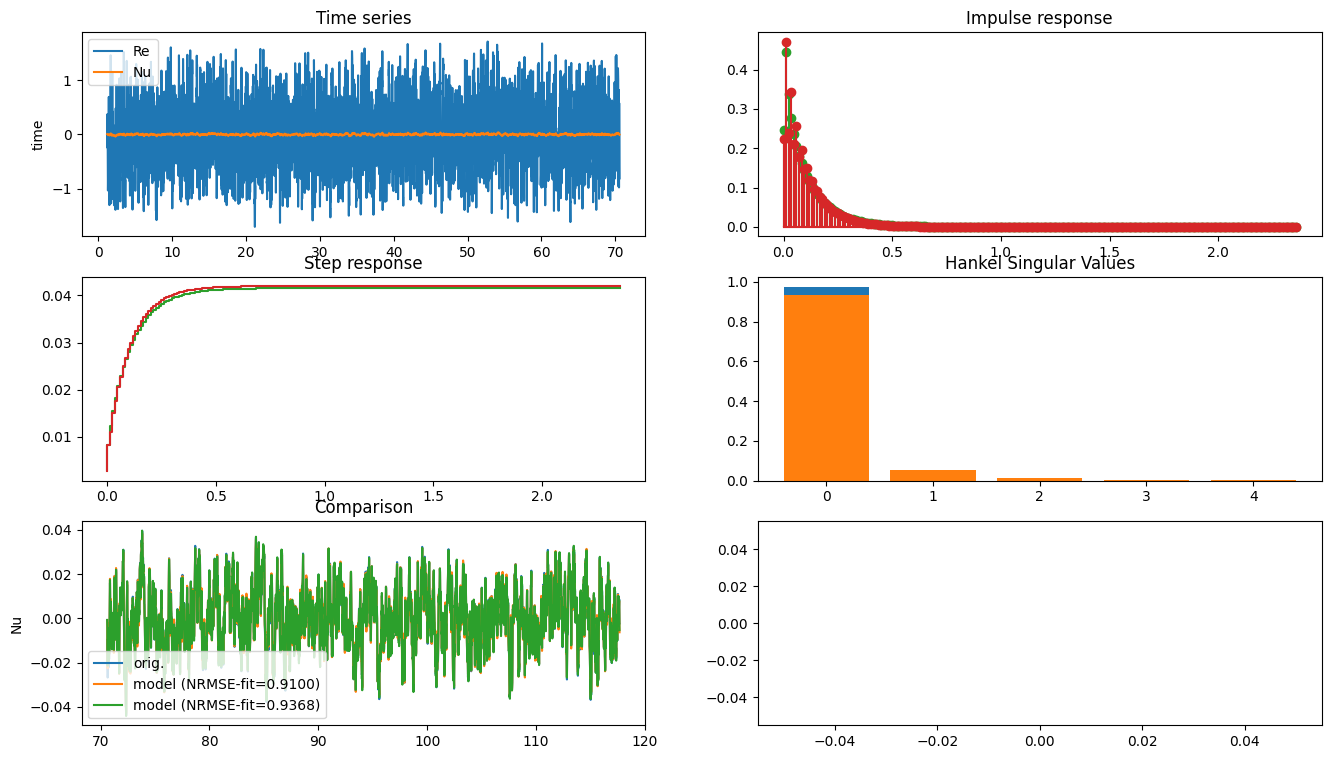

In [7]:
with llsi.Figure() as fig:
    fig.plot(data)
    mod1 = llsi.sysid(data, "Nu", "Re", (2,), method="po-moesp")
    mod2 = llsi.sysid(data, "Nu", "Re", (2,), method="n4sid")
    fig.plot([mod1, mod2], "impulse")
    fig.plot([mod1, mod2], "step")
    fig.plot([mod1, mod2], "hsv")
    fig.plot(
        {"mod": [mod1, mod2], "data": test_set, "y_name": "Nu", "u_name": "Re"},
        "compare",
    )